# **Dataset : Rice (Cammeo & Osmancik)**

Sumber : UCI

download disini : https://drive.google.com/file/d/1F3SuzD3AEsM7CTiLB2qe11ehdqr2kcTj/view?usp=sharing


## Latar Belakang



---

Pemilihan untuk mengkaji spesies beras Osmancik dan Cammeo di Turki didasarkan pada kehadiran dan sejarah penanaman yang signifikan di wilayah tersebut. Kedua spesies ini menarik perhatian karena karakteristik uniknya dan penyebaran penanamannya yang luas. Osmancik, dengan luas tanam yang besar sejak tahun 1997, dan Cammeo, yang diperkenalkan pada tahun 2014, dijadikan sampel representatif untuk pemeriksaan mendalam.

Pemahaman akan atribut morfologis dari kedua spesies beras ini penting untuk penelitian pertanian dan optimasi produksi. Osmancik ditandai dengan penampilan yang lebar, panjang, bersifat kaca, dan kusam, memberikan fitur yang unik yang menyumbang pada identitasnya. Di sisi lain, Cammeo menunjukkan sifat yang serupa, yaitu lebar dan panjang, dengan penampilan yang kaca dan kusam, namun variasi dalam fitur-fitur ini membedakannya dari Osmancik.

Untuk menyelami lebih dalam pada kompleksitas varietas beras ini, sebuah dataset yang terdiri dari 3810 gambar butir beras dikumpulkan. Setiap gambar menjalani proses yang cermat, memungkinkan ekstraksi fitur morfologis yang esensial. Dataset komprehensif ini memungkinkan analisis mendalam terhadap karakteristik yang berbeda ditunjukkan oleh Osmancik dan Cammeo, memberikan wawasan berharga terkait klasifikasi dan perbedaan spesies beras berdasarkan karakteristik visualnya.

Pemanfaatan machine learning, khususnya metode ensemble, pada dataset ini menjadi sangat penting untuk menciptakan model yang tangguh mampu mengklasifikasikan butir beras Osmancik dan Cammeo dengan akurasi tinggi. Dengan memanfaatkan teknik komputasi canggih, penelitian ini bertujuan untuk meningkatkan pemahaman terkait klasifikasi butir beras.

# **DATA PREPROCESSING**

In [ ]:
# Import semua tools yang dibutuhkan

import pandas as pd
import gdown
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
#Membaca Dataset

df=pd.read_csv("Rice_Osmancik_Cammeo_Dataset.csv")

df

,AREA,PERIMETER,MAJORAXIS,MINORAXIS,ECCENTRICITY,CONVEX_AREA,EXTENT,CLASS
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo
...,...,...,...,...,...,...,...,...
3805,11441,415.858002,170.486771,85.756592,0.864280,11628,0.681012,Osmancik
3806,11625,421.390015,167.714798,89.462570,0.845850,11904,0.694279,Osmancik
3807,12437,442.498993,183.572922,86.801979,0.881144,12645,0.626739,Osmancik
3808,9882,392.296997,161.193985,78.210480,0.874406,10097,0.659064,Osmancik


Dapat dilihat dari dataset ini terdapat 3810 baris dan 8 kolom/fitur.

In [ ]:
# Melihat data 5 row teratas
df.head()

,AREA,PERIMETER,MAJORAXIS,MINORAXIS,ECCENTRICITY,CONVEX_AREA,EXTENT,CLASS
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo


Berikut penjelasan dari tiap fitur/kolom :

1. **Area:** Mengembalikan jumlah piksel dalam batas butir beras. Fitur ini memberikan informasi tentang ukuran keseluruhan dari butir beras dalam bentuk jumlah piksel yang tercakup.

2. **Perimeter:** Menghitung keliling dengan mengukur jarak antara piksel di sekitar batas butir beras. Fitur ini memberikan informasi tentang panjang total batas butir beras, yang dapat memberikan gambaran tentang kompleksitas bentuk butir tersebut.

3. **Major Axis Length:** Fitur ini mengukur panjang terpanjang yang dapat digambar pada butir beras, yaitu jarak sumbu utama. Menyediakan informasi tentang dimensi utama butir beras.

4. **Minor Axis Length:** Mengukur panjang terpendek yang dapat digambar pada butir beras. Menyediakan informasi tentang dimensi kedua butir beras.

5. **Eccentricity:** Mengukur seberapa bundar elips yang memiliki momen yang sama dengan butir beras. Fitur ini memberikan gambaran tentang bentuk butir beras, apakah lebih memanjang atau lebih bundar.

6. **Convex Area:** Mengembalikan jumlah piksel pada cangkang konveks terkecil dari wilayah yang dibentuk oleh butir beras. Menyediakan informasi tentang kompleksitas bentuk butir beras.

7. **Extent:** Mengembalikan rasio antara wilayah yang dibentuk oleh butir beras dan kotak pembatasnya. Rasio ini memberikan gambaran tentang seberapa banyak wilayah dari kotak pembatas yang benar-benar diisi oleh butir beras.

8. **Class:** Menunjukkan jenis butir beras, yaitu Cammeo atau Osmancik. Ini adalah variabel target atau label yang ingin diprediksi dalam tugas klasifikasi

In [ ]:
df.isnull().sum()

AREA            0
PERIMETER       0
MAJORAXIS       0
MINORAXIS       0
ECCENTRICITY    0
CONVEX_AREA     0
EXTENT          0
CLASS           0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AREA          3810 non-null   int64  
 1   PERIMETER     3810 non-null   float64
 2   MAJORAXIS     3810 non-null   float64
 3   MINORAXIS     3810 non-null   float64
 4   ECCENTRICITY  3810 non-null   float64
 5   CONVEX_AREA   3810 non-null   int64  
 6   EXTENT        3810 non-null   float64
 7   CLASS         3810 non-null   object 
dtypes: float64(5), int64(2), object(1)
memory usage: 238.2+ KB



Hasil dari df.info() menunjukkan bahwa dataset terdiri dari 3810 entri dengan total 8 kolom. Tidak ada nilai null dalam setiap kolom, sehingga tidak diperlukan langkah-langkah pengelolaan nilai yang hilang.

Jenis data dari setiap kolom mencakup tipe data numerik (int64 dan float64) untuk fitur-fitur morfologis seperti AREA, PERIMETER, MAJORAXIS, MINORAXIS, ECCENTRICITY, CONVEX_AREA, dan EXTENT. Kolom terakhir, CLASS, adalah kolom kategorikal dengan tipe data objek, yang mewakili kelas dari setiap entri, yaitu jenis beras (Cammeo atau Osmancik).

Selain itu, dapat diobservasi bahwa dataset ini relatif tidak besar, memakan ruang memori sekitar 238.2 KB. Ini adalah hal yang baik karena memudahkan manipulasi dan analisis data.

In [ ]:
# Mengganti nilai 'Cammeo' dalam kolom 'CLASS' dengan 0, dan 'Osmancik' dengan 1 secara inplace.
df['CLASS'].replace('Cammeo', 0,inplace=True)
df['CLASS'].replace('Osmancik', 1,inplace=True)

Penggantian nilai 'Cammeo' dengan 0 dan 'Osmancik' dengan 1 pada kolom 'CLASS' dalam dataframe telah dilakukan. Tindakan ini memetakan kelas variabel target menjadi nilai numerik, mempersiapkannya untuk proses pemodelan machine learning yang memerlukan input numerik

In [ ]:
# Memeriksa data duplikat berdasarkan seluruh kolom
duplicate_rows = df[df.duplicated()]
print("\nData Duplikat:")
print(duplicate_rows)


Data Duplikat:
Empty DataFrame
Columns: [AREA, PERIMETER, MAJORAXIS, MINORAXIS, ECCENTRICITY, CONVEX_AREA, EXTENT, CLASS]
Index: []


# **EDA**

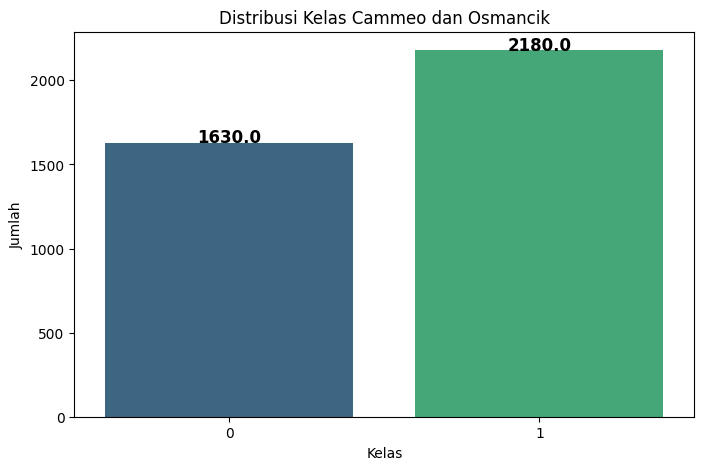

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung jumlah setiap kelas
class_counts = df['CLASS'].value_counts()

# Plot bar chart dengan label jumlah pasti
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")

# Menambahkan label jumlah pasti di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', weight='bold')

plt.title('Distribusi Kelas Cammeo dan Osmancik')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.show()

<Axes: >

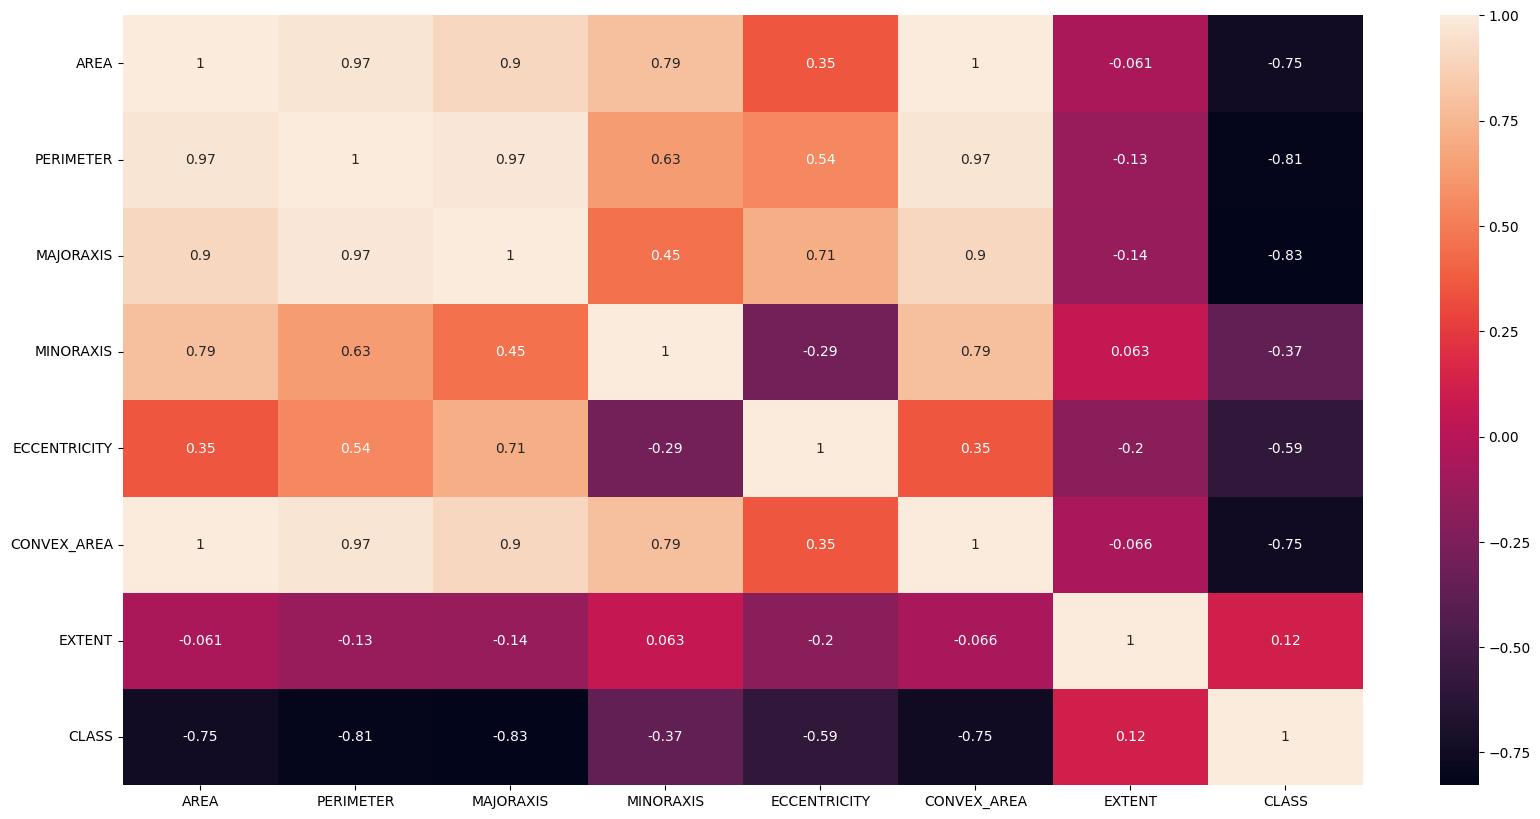

In [ ]:
# Membuat visualisasi heatmap dari korelasi antar kolom dalam DataFrame 'df'.
# Ukuran figur adalah 20x10 inci.
# Anotasi (nilai numerik) ditampilkan pada heatmap.
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True)

Dari hasil heatmap diatas, dapat dilihat untuk beberapa fitur memiliki korelasi yang tinggi. Diantaranya CONVEX_AREA, PERIMETER, MAJORAXIS, MINORAXIS dengan fitur AREA. Selain itu ada beberapa korelasi antar fitur lainnya yang memiliki korelasi cukup tinggi

In [ ]:
df.drop(labels=['CONVEX_AREA', 'PERIMETER', 'MAJORAXIS', 'MINORAXIS'],
        axis=1, inplace=True)

df

,AREA,ECCENTRICITY,EXTENT,CLASS
0,15231,0.928882,0.572896,0
1,14656,0.895405,0.615436,0
2,14634,0.912118,0.693259,0
3,13176,0.891861,0.640669,0
4,14688,0.906691,0.646024,0
...,...,...,...,...
3805,11441,0.864280,0.681012,1
3806,11625,0.845850,0.694279,1
3807,12437,0.881144,0.626739,1
3808,9882,0.874406,0.659064,1


Kami memutuskan untuk menghilangkan kolom 'CONVEX_AREA', 'PERIMETER', 'MAJORAXIS', dan 'MINORAXIS' karena berkorelasi dengan fitur 'AREA' di dataset.

Fitur yang berkorelasi dapat menimbulkan multikolinearitas, yang mungkin memengaruhi performa model machine learning. Multikolinearitas dapat menyebabkan ketidakstabilan dalam koefisien model dan menyulitkan interpretasi pentingnya fitur individual.

Dengan menghilangkan fitur-fitur yang berkorelasi, kami bertujuan untuk mengurangi potensi masalah terkait multikolinearitas dan menyederhanakan kumpulan data untuk performa model yang lebih baik. Keputusan ini sejalan dengan praktik terbaik dalam pemilihan fitur dan preprocessing untuk meningkatkan ketahanan dan efisiensi model machine learning.

In [ ]:
df.shape

(3810, 4)

Dapat dilihat bentuk dataframe setelah drop menjadi 3810 baris dan 4 fitur

In [ ]:
X=df.iloc[:, :-1]
X.head()

,AREA,ECCENTRICITY,EXTENT
0,15231,0.928882,0.572896
1,14656,0.895405,0.615436
2,14634,0.912118,0.693259
3,13176,0.891861,0.640669
4,14688,0.906691,0.646024


Kode diatas digunakan untuk mengambil semua baris dan semua kolom kecuali kolom terakhir dari DataFrame df, dan X.head() digunakan untuk menampilkan lima baris pertama dari DataFrame X.

Hasil dari kode tersebut adalah variabel X yang berisi subset dari DataFrame df tanpa kolom terakhir (kolom target). Dalam konteks ini, ini adalah persiapan data untuk model machine learning, di mana kita memisahkan fitur-fitur (X) dari label/target (y)

In [ ]:
from sklearn.preprocessing import LabelEncoder
y=df.iloc[:,-1]

rice_encoder = LabelEncoder()
y = rice_encoder.fit_transform(y)
y

array([0, 0, 0, ..., 1, 1, 1])

Sintaks diatas menggunakan `LabelEncoder` dari scikit-learn untuk mengubah label kelas pada kolom target `y` menjadi bentuk yang dapat digunakan oleh model machine learning. Berikut adalah penjelasan langkah-langkahnya:

1. **`from sklearn.preprocessing import LabelEncoder`**: Ini mengimpor kelas `LabelEncoder` dari modul `sklearn.preprocessing`.

2. **`y = df.iloc[:, -1]`**: Ini memilih kolom terakhir dari DataFrame `df` dan menetapkannya ke variabel `y`. Variabel `y` ini sekarang berisi label kelas yang ingin diubah.

3. **`rice_encoder = LabelEncoder()`**: Membuat objek `LabelEncoder` yang akan digunakan untuk melakukan transformasi label kelas.

4. **`y = rice_encoder.fit_transform(y)`**: Menggunakan metode `fit_transform` dari `LabelEncoder` untuk mengubah label kelas menjadi bentuk numerik. Metode `fit_transform` secara otomatis mengidentifikasi kelas-kelas unik dalam `y` dan menggantinya dengan bilangan bulat.

5. **`y`**: Setelah transformasi, variabel `y` sekarang berisi label kelas yang telah diubah menjadi bentuk numerik.

Jadi, keseluruhan sintaks tersebut berguna untuk Ubah label kelas dalam kolom terakhir dari DataFrame `df` menjadi bentuk numerik menggunakan `LabelEncoder`. Transformasi ini sering diperlukan dalam machine learning ketika model memerlukan variabel target dalam bentuk numerik, seperti pada tugas klasifikasi ini.



#### Data Splitting


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Dalam dua blok kode tersebut, dilakukan dua tahap penting dalam pra-pemrosesan data untuk mempersiapkannya sebelum digunakan dalam pelatihan model machine learning.

Pertama, menggunakan `StandardScaler` dari scikit-learn, fitur-fitur dalam DataFrame `X` diubah sedemikian rupa sehingga memiliki rata-rata nol dan deviasi standar satu. Hal ini diperlukan untuk memastikan bahwa semua fitur memiliki skala yang serupa, sehingga model machine learning tidak akan memiliki predisposisi terhadap fitur-fitur dengan magnitudo yang lebih besar. Hasil transformasi tersebut disimpan kembali ke dalam variabel `X`.

Kemudian, data dibagi menjadi dua set, yaitu set pelatihan (`X_train` dan `y_train`) dan set pengujian (`X_test` dan `y_test`). Proses ini dilakukan menggunakan fungsi `train_test_split` dari scikit-learn dengan proporsi pengujian sebesar 20%. Pembagian ini penting untuk menguji kinerja model pada data yang tidak pernah dilihat selama pelatihan. Penggunaan `random_state` dengan nilai tertentu (dalam hal ini, 1) memastikan bahwa pembagian dilakukan secara acak tetapi dapat direproduksi, sehingga mempermudah evaluasi model secara konsisten.

Secara keseluruhan, kedua tahapan ini, yaitu standarisasi fitur dan pembagian dataset, adalah langkah-langkah yang umum dilakukan dalam pra-pemrosesan data untuk memastikan bahwa data siap digunakan dalam proses pelatihan model machine learning dengan performa yang optimal.

# **MODELING**

## Ringkasan Metode (Random Forest)


---

**Random Forest Classifier:**

**Definisi:**
Random Forest adalah algoritma ensemble yang digunakan untuk tugas klasifikasi dan regresi. Ini membangun sejumlah besar pohon keputusan selama pelatihan dan menggabungkan output mereka untuk meningkatkan kinerja dan ketahanan terhadap overfitting.

**Cara Kerja:**
1. **Bootstrap Sampling:** Membuat banyak subset acak (bootstrap samples) dari dataset pelatihan.
2. **Pembuatan Pohon:** Untuk setiap subset, membangun pohon keputusan secara independen dengan menggunakan subset tersebut. Pohon-pohon ini dilatih dengan fitur-fitur acak untuk mencegah korrelasi yang tinggi antar-pohon.
3. **Voting (Klasifikasi):** Untuk tugas klasifikasi, kelas yang paling banyak muncul di antara output semua pohon diambil sebagai prediksi kelas final. Untuk regresi, prediksi rata-rata dari semua pohon diambil.

**Keunggulan:**
- **Ketahanan Terhadap Overfitting:** Kombinasi dari banyak pohon keputusan dapat mengurangi overfitting.
- **Kemampuan Mengatasi Fitur Penting:** Menyediakan informasi tentang kepentingan relatif dari setiap fitur.

**Parameter Penting:**
- **n_estimators:** Jumlah pohon dalam ensemble.
- **max_depth:** Kedalaman maksimum setiap pohon.
- **min_samples_split:** Jumlah sampel minimum yang diperlukan untuk membagi simpul internal.
- **min_samples_leaf:** Jumlah sampel minimum yang diperlukan di setiap daun.

**Penerapan Umum:**
- **Klasifikasi dan Regresi:** Dapat digunakan untuk kedua jenis tugas.
- **Data Besar dan Kompleks:** Efektif pada dataset besar dan kompleks.

**Catatan Penting:**
- **Kecepatan dan Efisiensi:** Lebih efisien dibandingkan beberapa model kompleks, tetapi membutuhkan lebih banyak waktu daripada model yang lebih sederhana.
- **Sensitif Terhadap Skala:** Preprocessing data seperti standarisasi dapat mempengaruhi performa.

### Baseline Model

In [ ]:
# Baseline Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Inisialisasi model Random Forest
rf_classifier = RandomForestClassifier()

# Melatih model pada data latih
rf_classifier.fit(X_train, y_train)

# Membuat prediksi pada data uji
y_pred = rf_classifier.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.916010498687664


Dalam hasil baseline model menggunakan Random Forest Classifier, akurasi model mencapai 91.7%. Akurasi merupakan ukuran yang menggambarkan sejauh mana model mampu memprediksi kelas dengan benar dari total kasus yang dievaluasi. Angka akurasi yang tinggi pada model baseline ini menunjukkan bahwa Random Forest dengan parameter default memiliki kemampuan yang baik dalam membedakan dan mengklasifikasikan jenis beras (Cammeo atau Osmancik) berdasarkan fitur-fitur morfologis yang diberikan.

Selanjutnya, untuk meningkatkan performa model, kami melakukan penyetelan parameter (hyperparameter tuning) yang terbagi ke 3 skema.

Namun, sebagai langkah awal, baseline model ini memberikan hasil yang memuaskan.

### Ekplorasi Model (Hyperparameter tuning)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Skema Model 1
param_grid_1 = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model_1 = RandomForestClassifier(random_state=42)
grid_search_1 = GridSearchCV(estimator=rf_model_1,
                             param_grid=param_grid_1,
                             cv=5, scoring='accuracy')
grid_search_1.fit(X_train, y_train)
best_model_1 = grid_search_1.best_estimator_

# Skema Model 2
param_grid_2 = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 15, 30],
    'min_samples_split': [2, 6, 12],
    'min_samples_leaf': [1, 3, 5]
}

rf_model_2 = RandomForestClassifier(random_state=42)
grid_search_2 = GridSearchCV(estimator=rf_model_2,
                             param_grid=param_grid_2,
                             cv=5, scoring='accuracy')
grid_search_2.fit(X_train, y_train)
best_model_2 = grid_search_2.best_estimator_

# Skema Model 3
param_grid_3 = {
    'n_estimators': [80, 120, 160],
    'max_depth': [None, 12, 24],
    'min_samples_split': [3, 7, 15],
    'min_samples_leaf': [2, 4, 6]
}

rf_model_3 = RandomForestClassifier(random_state=42)
grid_search_3 = GridSearchCV(estimator=rf_model_3,
                             param_grid=param_grid_3,
                             cv=5, scoring='accuracy')
grid_search_3.fit(X_train, y_train)
best_model_3 = grid_search_3.best_estimator_

# Model 1
y_pred_1 = best_model_1.predict(X_test)
accuracy_1 = accuracy_score(y_test, y_pred_1)
print("Model 1 - Best Parameters:", grid_search_1.best_params_)
print(f"Model 1 - Accuracy: {accuracy_1:.4f}")

# Model 2
y_pred_2 = best_model_2.predict(X_test)
accuracy_2 = accuracy_score(y_test, y_pred_2)
print("Model 2 - Best Parameters:", grid_search_2.best_params_)
print(f"Model 2 - Accuracy: {accuracy_2:.4f}")

# Model 3
y_pred_3 = best_model_3.predict(X_test)
accuracy_3 = accuracy_score(y_test, y_pred_3)
print("Model 3 - Best Parameters:", grid_search_3.best_params_)
print(f"Model 3 - Accuracy: {accuracy_3:.4f}")

Model 1 - Best Parameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Model 1 - Accuracy: 0.9291
Model 2 - Best Parameters: {'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 12, 'n_estimators': 100}
Model 2 - Accuracy: 0.9331
Model 3 - Best Parameters: {'max_depth': 12, 'min_samples_leaf': 6, 'min_samples_split': 3, 'n_estimators': 120}
Model 3 - Accuracy: 0.9278


Hasil dari proses hyperparameter tuning menunjukkan peningkatan performa model dibandingkan dengan baseline model. Berikut adalah analisis dari hasil tuning parameter untuk tiga model yang berbeda:

**Analisis:**
1. **Peningkatan Akurasi:** Semua model setelah tuning parameter mengalami peningkatan akurasi dibandingkan dengan baseline model. Ini menunjukkan bahwa penyetelan parameter secara efektif meningkatkan kemampuan prediktif model.
  
2. **Parameter Terbaik:**
   - **Max Depth:** Menunjukkan kedalaman maksimum setiap pohon. Model 2 memiliki max depth yang lebih rendah, mungkin untuk mencegah overfitting.
   - **Min Samples Leaf dan Min Samples Split:** Menunjukkan jumlah sampel minimum yang diperlukan di daun dan dalam pembagian, berturut-turut. Model 2 dan 3 memiliki nilai yang lebih tinggi, mungkin untuk mencegah overfitting dengan mengharuskan pohon-pohon lebih umum.
   - **n_estimators:** Menunjukkan jumlah pohon dalam ensemble. Model 2 memiliki jumlah pohon yang lebih tinggi, mungkin memberikan hasil yang lebih stabil.

3. **Performa Terbaik:** Model 2 mencapai akurasi tertinggi (93.31%), yang menunjukkan bahwa parameter yang disetel untuk model tersebut memberikan hasil yang optimal dalam tugas klasifikasi pada dataset ini.

4. **Pentingnya Penyetelan Parameter:** Proses hyperparameter tuning adalah langkah kritis untuk memaksimalkan kinerja model. Hasil yang didapatkan menunjukkan bahwa dengan penyetelan parameter yang tepat, kita dapat meningkatkan kemampuan model untuk memahami pola yang kompleks dalam data morfologis beras.

# **EVALUATION**

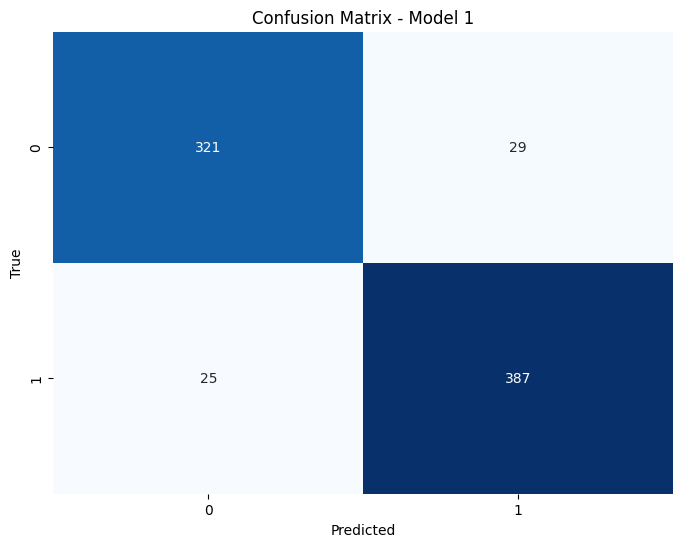

Model 1 - Accuracy: 0.9291338582677166
Classification Report - Model 1:
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       350
           1       0.93      0.94      0.93       412

    accuracy                           0.93       762
   macro avg       0.93      0.93      0.93       762
weighted avg       0.93      0.93      0.93       762





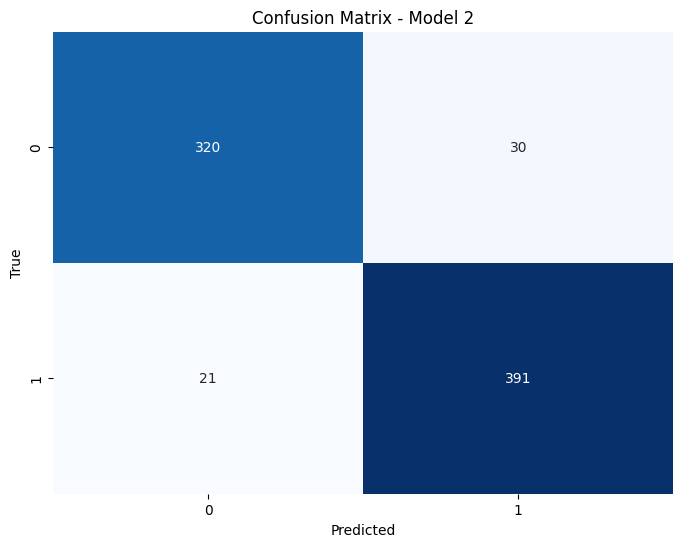

Model 2 - Accuracy: 0.9330708661417323
Classification Report - Model 2:
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       350
           1       0.93      0.95      0.94       412

    accuracy                           0.93       762
   macro avg       0.93      0.93      0.93       762
weighted avg       0.93      0.93      0.93       762





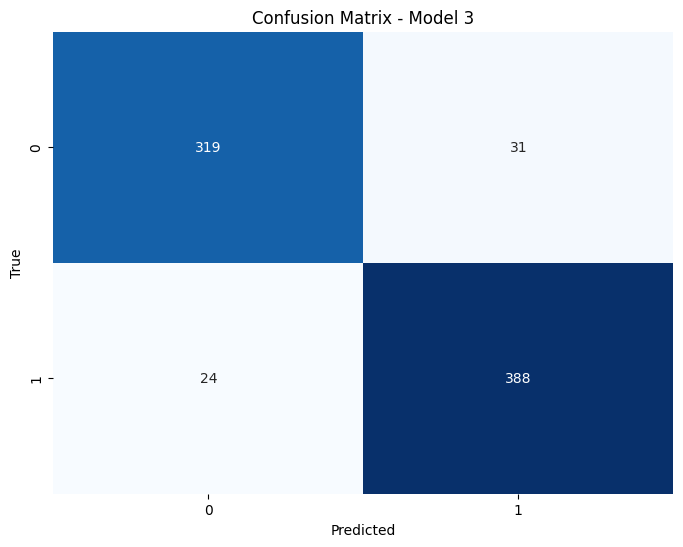

Model 3 - Accuracy: 0.9278215223097113
Classification Report - Model 3:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       350
           1       0.93      0.94      0.93       412

    accuracy                           0.93       762
   macro avg       0.93      0.93      0.93       762
weighted avg       0.93      0.93      0.93       762





In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

best_models = [best_model_1, best_model_2, best_model_3]

for idx, model in enumerate(best_models, start=1):
    # Evaluasi Model
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Visualisasi Matriks Kebingungan
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f'Confusion Matrix - Model {idx}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Menampilkan Hasil Evaluasi
    print(f"Model {idx} - Accuracy: {accuracy}")
    print(f"Classification Report - Model {idx}:\n{classification_rep}")
    print("\n" + "="*50 + "\n")

Pada hasil diatas terdapat Confusion Matrix, Accuracy dan Classification Report yang juga sebagai metrik evaluasi dari tiap model hasil tuning. Berikut adalah penjelasannya :

Precision : Precision mengukur sejauh mana prediksi positif yang dihasilkan oleh model adalah benar.

Recall : Recall mengukur sejauh mana model dapat mengidentifikasi seluruh kelas positif yang sebenarnya.

F1-Score : F1-score adalah harmonic mean antara precision dan recall.

Support : Memberikan konteks tentang seberapa umum atau langka suatu kelas dalam data. Support yang tinggi menunjukkan bahwa kelas tersebut muncul lebih sering, sementara support yang rendah menunjukkan sebaliknya.



---


## Hasil dan Analisis


---



Dalam pengembangan model klasifikasi untuk jenis beras Cammeo dan Osmancik menggunakan teknik ensemble, tiga model berbeda telah dikembangkan dan dievaluasi. Berikut adalah hasil dan analisis dari masing-masing model:

#### Model 1
- **Parameter Terbaik:** {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
- **Akurasi:** 92.91%
  
  **Analisis:**
  - Model 1 memberikan akurasi yang baik, menunjukkan kemampuan yang solid dalam mengklasifikasikan jenis beras.
  - Parameter terbaik menunjukkan pentingnya kedalaman maksimum dan jumlah sampel minimum dalam membangun pohon keputusan.

#### Model 2
- **Parameter Terbaik:** {'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 12, 'n_estimators': 100}
- **Akurasi:** 93.31%
  
  **Analisis:**
  - Model 2 menghasilkan akurasi tertinggi di antara ketiga model, menunjukkan kinerja yang sangat baik dalam membedakan jenis beras.
  - Penggunaan lebih banyak pohon (n_estimators) dan parameter untuk mencegah overfitting (max_depth, min_samples_leaf, min_samples_split) menjadi faktor penting.

#### Model 3
- **Parameter Terbaik:** {'max_depth': 12, 'min_samples_leaf': 6, 'min_samples_split': 3, 'n_estimators': 120}
- **Akurasi:** 92.78%
  
  **Analisis:**
  - Model 3 memberikan akurasi yang solid, walaupun sedikit di bawah Model 1 dan 2.
  - Parameter terbaik menunjukkan bahwa peningkatan jumlah pohon (n_estimators) dapat membantu meningkatkan performa model.

### Perbandingan dan Pilihan Model
- Model 2 menunjukkan kinerja tertinggi dengan akurasi 93.31%, membuatnya menjadi pilihan utama untuk tugas klasifikasi ini.
- Penggunaan teknik ensemble, hyperparameter tuning, dan analisis hasil evaluasi membantu memahami dan meningkatkan performa model dalam membedakan antara jenis beras Cammeo dan Osmancik.
- Selanjutnya, dapat dilakukan analisis lebih lanjut dan fine-tuning untuk memperbaiki performa model atau mempertimbangkan teknik ensemble lanjutan.




---


## Kesimpulan


---


Dalam penelitian ini, telah dilakukan pengembangan model klasifikasi menggunakan teknik ensemble, dengan fokus pada jenis beras Cammeo dan Osmancik. Tiga model berbeda telah dibangun dan dievaluasi dengan menggunakan teknik hyperparameter tuning.

Kesimpulan dari penelitian ini adalah sebagai berikut:

Pertama, melalui proses evaluasi, Model 2 berhasil mencapai akurasi tertinggi sebesar 93.31%, menunjukkan kemampuan yang sangat baik dalam mengklasifikasikan jenis beras. Penerapan hyperparameter tuning pada setiap model membuktikan bahwa penyetelan parameter dapat meningkatkan performa model dalam tugas klasifikasi ini. Analisis confusion matrix dan laporan klasifikasi memberikan wawasan tambahan tentang sejauh mana model dapat mengklasifikasikan setiap kelas dengan baik.

Kedua, pemahaman lebih lanjut tentang fitur-fitur morfologis dan perbandingan kinerja model membantu memilih Model 2 sebagai model utama untuk tugas klasifikasi ini. Penggunaan teknik ensemble, seperti Random Forest, memberikan keunggulan dalam mengatasi overfitting dan meningkatkan generalisasi model terhadap data uji.

Terakhir, penelitian ini memberikan kontribusi pada pemahaman tentang penerapan teknik ensemble dalam konteks klasifikasi jenis beras berdasarkan karakteristik morfologis. Dengan pemilihan dan pengaturan parameter yang tepat, model klasifikasi dapat memberikan hasil yang memuaskan dalam mengidentifikasi perbedaan antara jenis beras Cammeo dan Osmancik. Diharapkan bahwa temuan dari penelitian ini dapat mendukung pengembangan dan penelitian lebih lanjut di bidang ini.